In [114]:
import pandas as pd

In [150]:
df_sets_brickset = pd.read_csv('sets-brickset.csv')

# change number to bricklink format
df_sets_brickset['Number'] = [
    f'{number}-{variant}' for number, variant 
    in zip(df_sets_brickset['Number'], df_sets_brickset['Variant'])
]

# change column names, filter columns
df_sets_brickset = df_sets_brickset.rename(
    columns={col: col.lower() for col in list(df_sets_brickset)}
)[['number', 'theme', 'year', 'name', 'minifigs', 'pieces', 'usprice']]

# filter out sets with fewer than 25 pieces
df_sets_brickset = df_sets_brickset[df_sets_brickset['pieces'] > 25]

# filter out sets with NaN prices
df_sets_brickset = df_sets_brickset.dropna(subset=['usprice'])

# make NaN minifigs 0.0
df_sets_brickset = df_sets_brickset.fillna(value={'minifigs': 0.0})

# set types
df_sets_brickset = df_sets_brickset.astype({
    'number': 'str',
    'year': 'str'
})

df_sets_brickset

,number,theme,year,name,minifigs,pieces,usprice
0,497-1,Space,1979,Galaxy Explorer,4.0,338.0,32.00
1,1072-1,Dacta,1979,Supplementary LEGO Set,0.0,304.0,16.30
6,341-2,Fabuland,1979,Catherine Cat's House and Mortimer Mouse,2.0,123.0,3.00
91,8858-2,Technic,1980,Auto Engines,0.0,460.0,69.00
92,744-1,Basic,1980,"Universal Building Set with Motor, 7+",0.0,537.0,59.00
...,...,...,...,...,...,...,...
14386,41387-1,Friends,2019,Olivia's Summer Heart Box,2.0,93.0,7.99
14387,41388-1,Friends,2019,Mia's Summer Heart Box,1.0,85.0,7.99
14414,853906-1,Seasonal,2019,LEGO Greeting Card,0.0,40.0,4.99
14430,30362-1,City,2019,Sky Police Jetpack,2.0,33.0,3.99


In [151]:
df_sets_bricklink = pd.read_csv('sets-bricklink.tsv', sep='\t')

# rename and filter columns
df_sets_bricklink = df_sets_bricklink.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'set_weight',
    }
)[['number', 'set_weight']]

# filter out sets without weight data
df_sets_bricklink = df_sets_bricklink[df_sets_bricklink['set_weight'] != '?']

# set types
df_sets_bricklink = df_sets_bricklink.astype({
    'number': 'str',
    'set_weight': 'float'
})

df_sets_bricklink

,number,set_weight
8,041-2,569.0
11,101-1,74.0
15,1029-1,142.0
17,1030-1,1189.0
18,1031-1,277.0
...,...,...
15568,75964-21,13.0
15569,75964-22,7.0
15570,75964-23,12.0
15571,75964-24,5.0


In [152]:
df_boxes = pd.read_csv('boxes-bricklink.tsv', sep='\t')

# rename and filter columns
df_boxes = df_boxes.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'box_weight'
    }
)[['number', 'box_weight']]

# filter out sets without weight data
df_boxes = df_boxes[df_boxes['box_weight'] != '?']

# set types
df_boxes = df_boxes.astype({
    'number': 'str',
    'box_weight': 'float'
})

df_boxes

,number,box_weight
3,367-1,134.00
5,2164-1,0.45
8,217-2,41.00
9,603-2,3.00
11,293-1,30.00
...,...,...
15420,911951-1,1.50
15422,BIL01-1,14.00
15441,11920-1,2.00
15442,111903-2,1.50


In [153]:
df_instructions = pd.read_csv('instructions-bricklink.tsv', sep='\t')

# filter out instructions without weight
df_instructions = df_instructions[df_instructions['Weight (in Grams)'] != '?']

# rename and filter columns
df_instructions = df_instructions.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'instruction_weight'
    }
)[['number', 'instruction_weight']]

# set types
df_instructions = df_instructions.astype({
    'number': 'str',
    'instruction_weight': 'float'
})

df_instructions

,number,instruction_weight
0,8470-1,102.00
2,691-1,3.40
3,367-1,20.00
8,293-1,3.40
9,645-2,3.40
...,...,...
9231,col19-14,2.38
9232,col19-15,2.38
9233,col19-16,2.38
9235,GA11NoDk-99,9.00


In [155]:
# make a dictionary to compute inflation-adjusted prices

df_inflation = pd.read_csv('inflation.csv')
dollar_2019 = df_inflation['amount'].tolist()[-1]
dict_inflation = {
    str(year): dollar_2019 / amount for year, amount in zip(df_inflation['year'], df_inflation['amount'])
}

dict_inflation

{'1979': 3.5338567493112953,
 '1980': 3.113567961165048,
 '1981': 2.8224202420242026,
 '1982': 2.658632124352332,
 '1983': 2.5758835341365462,
 '1984': 2.469278152069298,
 '1985': 2.384368029739777,
 '1986': 2.340857664233577,
 '1987': 2.2584330985915497,
 '1988': 2.1687066779374473,
 '1989': 2.069016129032258,
 '1990': 1.9629533282325937,
 '1991': 1.8836857562408222,
 '1992': 1.8286386315039205,
 '1993': 1.7754878892733565,
 '1994': 1.731160593792173,
 '1995': 1.683451443569554,
 '1996': 1.63516889738687,
 '1997': 1.598492211838006,
 '1998': 1.5739754601226996,
 '1999': 1.539963985594238,
 '2000': 1.4898838559814174,
 '2001': 1.4486617730095992,
 '2002': 1.4261145080600333,
 '2003': 1.3943369565217392,
 '2004': 1.3581683430386449,
 '2005': 1.3136610343061954,
 '2006': 1.272609126984127,
 '2007': 1.2373662837244745,
 '2008': 1.1916136793263448,
 '2009': 1.195868311759743,
 '2010': 1.176569321642147,
 '2011': 1.1405669981639468,
 '2012': 1.1174420934344977,
 '2013': 1.1013105422889202,


In [163]:
# join it all together!
df_merged = (
    df_sets_brickset
        .merge(df_sets_bricklink, how='left', on='number')
        .merge(df_boxes, how='left', on='number')
        .merge(df_instructions, how='left', on='number')
)

# add inflation-adjusted price
df_merged['adjusted_price'] = [
    price * dict_inflation[year] for price, year in zip(df_merged['usprice'], df_merged['year'])
]

df_merged

,number,theme,year,name,minifigs,pieces,usprice,set_weight,box_weight,instruction_weight,adjusted_price
0,497-1,Space,1979,Galaxy Explorer,4.0,338.0,32.00,NaN,NaN,46.3,113.083416
1,1072-1,Dacta,1979,Supplementary LEGO Set,0.0,304.0,16.30,NaN,NaN,NaN,57.601865
2,341-2,Fabuland,1979,Catherine Cat's House and Mortimer Mouse,2.0,123.0,3.00,NaN,NaN,35.0,10.601570
3,8858-2,Technic,1980,Auto Engines,0.0,460.0,69.00,513.0,133.00,100.0,214.836189
4,744-1,Basic,1980,"Universal Building Set with Motor, 7+",0.0,537.0,59.00,1338.0,316.00,90.0,183.700510
...,...,...,...,...,...,...,...,...,...,...,...
5978,41387-1,Friends,2019,Olivia's Summer Heart Box,2.0,93.0,7.99,132.0,NaN,NaN,7.990000
5979,41388-1,Friends,2019,Mia's Summer Heart Box,1.0,85.0,7.99,128.0,NaN,NaN,7.990000
5980,853906-1,Seasonal,2019,LEGO Greeting Card,0.0,40.0,4.99,NaN,NaN,NaN,4.990000
5981,30362-1,City,2019,Sky Police Jetpack,2.0,33.0,3.99,24.4,2.00,3.7,3.990000


In [175]:
# take a peek at what we're working with

with pd.option_context('display.max_rows', None):
    display(df_merged[df_merged['year'] == '1991'])

,number,theme,year,name,minifigs,pieces,usprice,set_weight,box_weight,instruction_weight,adjusted_price
221,4558-1,Trains,1991,Metroliner,11.0,784.0,149.00,2800.00,NaN,127.00,280.669178
222,4563-1,Trains,1991,Load 'N Haul Railroad,3.0,476.0,120.00,2178.00,NaN,82.10,226.042291
223,6988-1,Space,1991,Alpha Centauri Outpost,5.0,406.0,80.00,1411.00,435.0,62.00,150.694860
224,4554-1,Trains,1991,Metro Station,8.0,600.0,72.00,1571.00,445.0,60.30,135.625374
225,6273-1,Pirates,1991,Rock Island Refuge,7.0,381.0,66.00,1249.00,457.0,50.00,124.323260
226,6541-1,Town,1991,Intercoastal Seaport,5.0,545.0,63.75,1362.00,NaN,42.00,120.084967
227,4031-1,Boats,1991,Firefighter,4.0,361.0,52.00,1081.00,NaN,39.80,97.951659
228,5550-1,Model Team,1991,Custom Rally Van,0.0,525.0,49.50,919.00,349.0,52.00,93.242445
229,6540-1,Town,1991,Pier Police,4.0,352.0,44.00,910.00,NaN,42.00,82.882173
230,6347-1,Town,1991,Monorail Accessory Track,0.0,54.0,35.00,927.00,299.0,20.00,65.929001


In [1219]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [1220]:
def process_set_data(
    df_sets, features, target, start_year='1979', end_year='2020',
    excluded_numbers=[], excluded_themes=[]
):

    df = df_sets.copy()

    df = df[
        (df['year'] <= end_year) &
        (df['year'] >= start_year) &
        (~df['number'].isin(excluded_numbers)) &
        (~df['theme'].isin(excluded_themes))
    ]

    # remove sets with missing column data
    df = df.dropna(subset=features)

    # deal with theme if included in model
    if 'theme' in features:
        # remove themes with fewer than 2 sets
        # remove duplo/quatro
        # some education sets are duplo
        theme_counts = df.groupby('theme').count()
        small_themes = list(theme_counts[theme_counts['number'] < 2].index)
        df = df[~df['theme'].isin(small_themes)]

        # one-hot encode theme
        col_theme = df['theme']
        df = pd.get_dummies(df, columns=['theme'])
        df['theme'] = col_theme
        
        # include one-hot columns in model
        model_features = [f for f in features if f != 'theme'] + [
            f for f in list(df) if 'theme_' in f 
        ]
    else:
        model_features = features
    
    return df, model_features



def train_test_split_(df_sets, target):
    df = df_sets.copy()
    
    if 'theme' in list(df_sets):
        stratify = df['theme']
    else:
        stratify = None
    
    df_X = df[[f for f in list(df) if f != target]]
    df_y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        df_X, df_y, train_size=0.8, stratify=None
    )
    
    return X_train, X_test, y_train, y_test

In [1232]:
# get piece weight
df_adj = df_merged.dropna(subset=['set_weight', 'box_weight', 'instruction_weight'])
df_adj['piece_weight'] = df_adj['set_weight'] - (df_adj['box_weight'] + df_adj['instruction_weight'])

target = 'adjusted_price'
excluded_themes=[
    'Clickits'
    'Dimensions',
    'Duplo',
    'Education',
    'Mindstorms',
    'Quatro',
]


# only use sets since strategic re-alignment (2005)
# excluding sets because their minifig counts are wrong
df, features = process_set_data(
    df_sets=df_adj[df_adj['adjusted_price'] != 0.0],
    features=['theme', 'minifigs', 'pieces', 'piece_weight'],
    target=target,
    start_year='2005',
    excluded_numbers=[
        '75252-1',
        '71044-1',
        '75936-1',
        '70425-1',
        '10267-1',
        '76122-1',
        '21155-1',
    ],
    excluded_themes=excluded_themes
)

X_train, X_test, y_train, y_test = train_test_split_(df, target)

c:\users\ivan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1233]:
# train model
model = GradientBoostingRegressor(n_estimators=1000)
model.fit(X_train[features], y_train)

imps = model.feature_importances_

print('\nFeature importances:')
display(sorted(list(zip(features, imps.tolist())), key=lambda elem: elem[1], reverse=True))


Feature importances:


[('piece_weight', 0.7895292035949262),
 ('pieces', 0.18711874714306398),
 ('theme_Star Wars', 0.006344095141977738),
 ('minifigs', 0.005283427841504313),
 ('theme_Make and Create', 0.002948649854827957),
 ('theme_Technic', 0.001656414787229626),
 ('theme_Creator', 0.0007780451780537469),
 ('theme_Dimensions', 0.0007680105160076447),
 ('theme_Bricks and More', 0.0005027838296219228),
 ('theme_Classic', 0.0004083680382287701),
 ('theme_City', 0.00035995307698499844),
 ('theme_Architecture', 0.0003462310274632174),
 ('theme_The LEGO Ninjago Movie', 0.00031376335139881),
 ('theme_DC Comics Super Heroes', 0.0003128626341986879),
 ('theme_Sports', 0.00030155688496883435),
 ('theme_The Lego Movie 2: The Second Part', 0.0002887749154768253),
 ('theme_Pirates of the Caribbean', 0.0002712829701757094),
 ('theme_Creator Expert', 0.0002534445327014877),
 ('theme_Exo-Force', 0.00023671178107601665),
 ('theme_Overwatch', 0.00018054698726456585),
 ('theme_Ideas', 0.0001543836926378583),
 ('theme_Race

In [1234]:
# evaluate the model

y_pred = model.predict(X_test[features])

print(f'R-squared train {model.score(X_train[features], y_train)}')
print(f'R-squared test {model.score(X_test[features], y_test)}')

df_test = X_test.copy()

# re-adjust price for inflation
df_test['prediction'] = [
    round(float(price) / dict_inflation[year], 2)
    for price, year in zip(y_pred, df_test['year'])
]
df_test['price'] = [
    float(price) / dict_inflation[year]
    for price, year in zip(y_test, df_test['year'])
]
df_test['raw_deviation'] = df_test['prediction'] - df_test['price']

print('\nMedian absolute deviation: $', round(df_test['raw_deviation'].abs().median(), 2))

with pd.option_context('display.max_rows', None):
    display(df_test[['name', 'theme', 'year', 'price', 'prediction', 'raw_deviation', 'minifigs', 'pieces', 'piece_weight']][:50])

R-squared train 0.9964557844063778
R-squared test 0.9387037670603114

Median absolute deviation: $ 2.43


,name,theme,year,price,prediction,raw_deviation,minifigs,pieces,piece_weight
3078,Spy Jet Escape,Cars,2011,49.99,36.30,-13.69,0.0,339.0,394.00
4399,Fire Suitcase,Juniors,2015,19.99,25.22,5.23,2.0,113.0,615.00
4764,Infernox captures the Queen,Nexo Knights,2016,24.99,22.84,-2.15,2.0,253.0,195.80
5442,S.O.G. Headquarters,Ninjago,2018,39.99,63.15,23.16,5.0,530.0,454.90
5737,Mia's House,Friends,2019,69.99,74.54,4.55,3.0,715.0,672.00
2825,Passenger Train,City,2010,129.99,108.67,-21.32,3.0,669.0,1495.00
3451,Elite Clone Trooper & Commando Droid Battle Pack,Star Wars,2012,12.99,12.57,-0.42,4.0,98.0,65.00
4933,Kuffs,Mixels,2016,4.99,5.26,0.27,0.0,63.0,36.50
2796,Santa Claus,Seasonal,2009,4.99,5.08,0.09,0.0,42.0,31.67
5251,McLaren 720S,Speed Champions,2017,14.99,15.98,0.99,1.0,161.0,124.70


In [1235]:
# estimate the price of the new star destroyer

set_features={
    'minifigs': 2.0,
    'piece_weight': 6800.0,
    'pieces': 4784.0,
    'theme': 'Star Wars'
}

def estimate_price(model, model_features, set_features):
    if 'theme' in set_features:
        set_features['theme_' + set_features['theme']] = 1
    features = {f: [set_features[f]] if f in set_features else [0] for f in model_features}
    df = pd.DataFrame(features)
    return model.predict(df[model_features])

estimate_price(model, features, set_features)

array([599.31932469])

let's do some plots!

In [1230]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def scatter_plot(
    x, 
    y,
    title='',
    x_label='', 
    y_label='',
    callout_x=None,
    callout_y=None
):
    plt.scatter(
        x,
        y, 
        s=10,
        alpha=0.3,
    )
    if callout_x is not None and callout_y is not None:
        plt.scatter(
            callout_x,
            callout_y, 
            s=15,
            alpha=0.8,
            color='red'
        )
    plt.plot(
        np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
        alpha=0.5,
        color='green',
    )
    plt.ylim(ymin=0)
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(axis='both', alpha=0.3)
    plt.show()

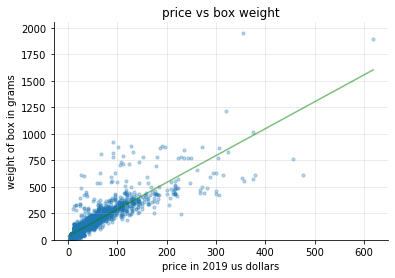

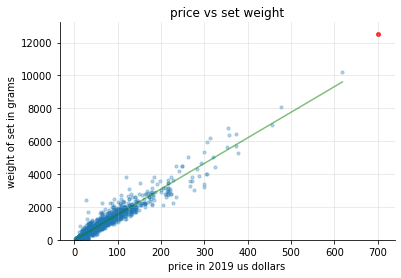

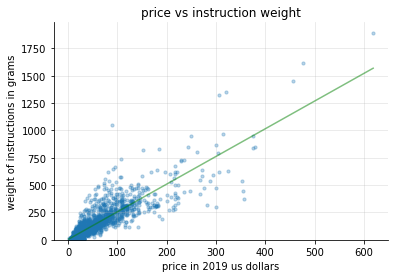

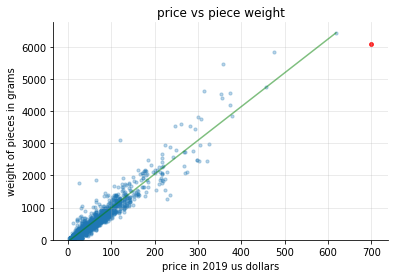

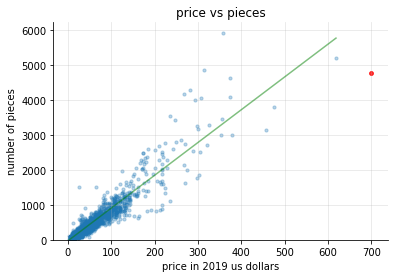

In [1231]:
scatter_plot(
    df['adjusted_price'],
    df['box_weight'],
    'price vs box weight',
    'price in 2019 us dollars',
    'weight of box in grams',
)

scatter_plot(
    df['adjusted_price'],
    df['set_weight'],
    'price vs set weight',
    'price in 2019 us dollars',
    'weight of set in grams',
    [699.99],
    [12500.0],
)

scatter_plot(
    df['adjusted_price'],
    df['instruction_weight'],
    'price vs instruction weight',
    'price in 2019 us dollars',
    'weight of instructions in grams',
)

scatter_plot(
    df['adjusted_price'],
    df['piece_weight'],
    'price vs piece weight',
    'price in 2019 us dollars',
    'weight of pieces in grams',
    [699.99],
    [6100.0],
)

scatter_plot(
    df['adjusted_price'],
    df['pieces'],
    'price vs pieces',
    'price in 2019 us dollars',
    'number of pieces',
    [699.99],
    [4782.0],
)

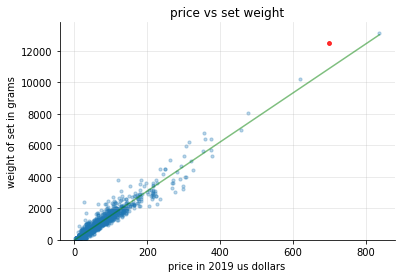

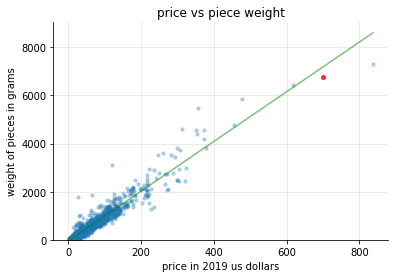

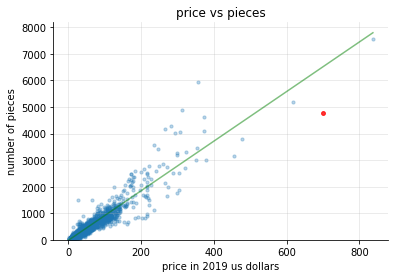

In [1216]:
# remove mindstorms to see some nonsense

df_mindstorms = df[df['theme'].isin(['Mindstorms'])]
df_plot = df[~df['theme'].isin(['Mindstorms'])]

scatter_plot(
    df_plot['adjusted_price'],
    df_plot['set_weight'],
    'price vs set weight',
    'price in 2019 us dollars',
    'weight of set in grams',
    df_mindstorms['adjusted_price'].tolist() + [699.99],
    df_mindstorms['set_weight'].tolist() + [12500.0],
)

scatter_plot(
    df_plot['adjusted_price'],
    df_plot['piece_weight'],
    'price vs piece weight',
    'price in 2019 us dollars',
    'weight of pieces in grams',
    df_mindstorms['adjusted_price'].tolist() + [699.99],
    df_mindstorms['piece_weight'].tolist() + [6780.0],
)

scatter_plot(
    df_plot['adjusted_price'],
    df_plot['pieces'],
    'price vs pieces',
    'price in 2019 us dollars',
    'number of pieces',
    df_mindstorms['adjusted_price'].tolist() + [699.99],
    df_mindstorms['pieces'].tolist() + [4782.0],
)

In [1199]:
df_ratios = df_adj[~df_adj['theme'].isin(excluded_themes)]
df_ratios['piece_weight_to_price'] = df_ratios['adjusted_price'] / df_ratios['piece_weight']
df_ratios['pieces_to_price'] = df_ratios['adjusted_price'] / df_ratios['pieces']
df_ratios['average_piece_weight'] = df_ratios['piece_weight'] / df_ratios['pieces']
df_ratios['year'] = df_ratios['year'].astype(int)

c:\users\ivan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\ivan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ivan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set 

In [1217]:
def year_plot(df, col, title='', y_label=''):
    plt.plot(
        df.index,
        df[col],
    )
    plt.ylim(ymin=0)
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.title(title)
    plt.ylabel(y_label)
#     plt.locator_params(axis='y', nbins=4)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
    plt.grid(axis='y', alpha=0.3)
    plt.show()

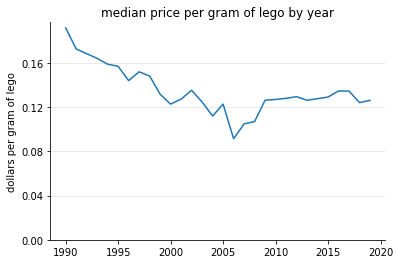

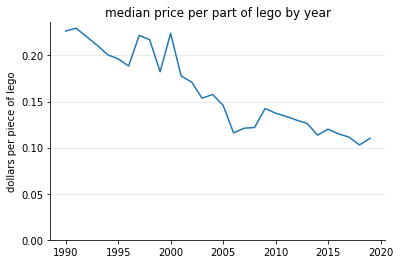

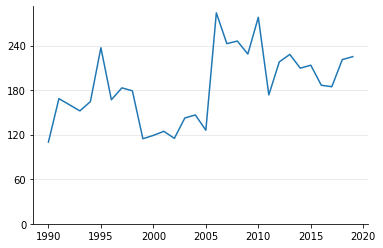

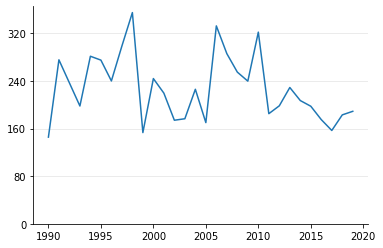

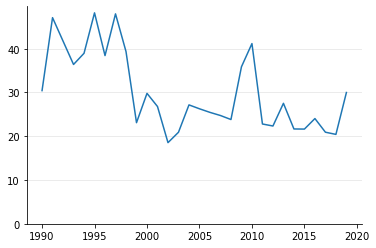

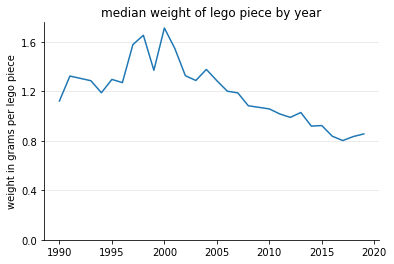

In [1218]:
df_year = df_ratios.groupby('year')[[
    'piece_weight_to_price', 'pieces_to_price', 'pieces', 'piece_weight', 'adjusted_price', 'average_piece_weight'
]].median()

df_year = df_year[df_year.index >= 1990]
year_plot(
    df_year, 
    'piece_weight_to_price',
    'median price per gram of lego by year',
    'dollars per gram of lego'
)
year_plot(
    df_year,
    'pieces_to_price',
    'median price per part of lego by year',
    'dollars per piece of lego'
)
year_plot(
    df_year, 
    'pieces'
)
year_plot(
    df_year, 
    'piece_weight'
)
year_plot(
    df_year, 
    'adjusted_price'
)
year_plot(
    df_year, 
    'average_piece_weight',
    'median weight of lego piece by year',
    'weight in grams per lego piece'
)

how did we get here?

- stud muffin bricks on instagram
- http://anjsbrickblog.blogspot.com/2018/12/lego-star-wars-2019-ucs-set-details.html
- https://www.reddit.com/r/lego/comments/ae00sb/2019_d2c_set_list_posted_on_eurobricks/
- https://www.eurobricks.com/forum/index.php?/forums/topic/120925-fairground-sets-rumours-and-discussion/&page=20
- https://www.eurobricks.com/forum/index.php?/forums/topic/167577-lego-star-wars-2019-set-discussion-read-first-post/&page=52


appendix 1: merge brickset year csvs (not necessary to run analysis)

In [37]:
import os

brickset_path = 'sets-brickset'
list_dfs_brickset = []

for filename in os.listdir(brickset_path):
    list_dfs_brickset.append(
        pd.read_csv(os.path.join(brickset_path, filename))
    )

df_sets_brickset = pd.concat(list_dfs_brickset, ignore_index=True)

In [32]:
df_sets_brickset.to_csv('sets-brickset.csv', index=False)

appendix 2: getting the set weight

In [1068]:
# make a dict of part weights
df_part_weights = pd.read_csv('parts-bricklink.tsv', sep='\t')
dict_part_weights = {
    number: float(weight) for number, weight in zip(
        df_part_weights['Number'].tolist(),
        df_part_weights['Weight (in Grams)'].tolist()
    ) if weight != '?'
}

In [1069]:
# get isd weight
df_isd_parts = pd.read_csv('75252-bricklink.tsv', sep='\t')
df_isd_parts['part_weight'] = [
    dict_part_weights[x] if x in dict_part_weights else 0.0 for x in df_isd_parts['Type'].tolist()
]
sum(df_isd_parts['Item Name'] * df_isd_parts['part_weight'])

6781.290999999996

In [1070]:
# validate this works with a known set
df_mf_parts = pd.read_csv('75192-bricklink.tsv', sep='\t')
df_mf_parts['part_weight'] = [
    dict_part_weights[x] if x in dict_part_weights else 0.0 for x in df_mf_parts['Type'].tolist()
]
sum(df_mf_parts['Item Name'] * df_mf_parts['part_weight'])

7210.767999999998